![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de modelos Bagging, Random Forest y XGBoost

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de Bagging, Random Forest y XGBoost. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este taller se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [4]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [7]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Árbol de decisión manual

En la celda 1 creen un árbol de decisión **manualmente**  que considere los set de entrenamiento y test definidos anteriormente y presenten el RMSE y MAE del modelo en el set de test.

In [ ]:
# Celda 1


### Punto 2 - Bagging manual

En la celda 2 creen un modelo bagging **manualmente** con 10 árboles de regresión y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 2


### Punto 3 - Bagging con librería

En la celda 3, con la librería sklearn, entrenen un modelo bagging con 10 árboles de regresión y el parámetro `max_features` igual a `log(n_features)` y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 3


### Punto 4 - Random forest con librería

En la celda 4, usando la librería sklearn entrenen un modelo de Randon Forest para regresión  y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 4


### Punto 5 - Calibración de parámetros Random forest

En la celda 5, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [ ]:
# Celda 5


### Punto 6 - XGBoost con librería

En la celda 6 implementen un modelo XGBoost de regresión con la librería sklearn y comenten sobre el desempeño del modelo.

In [16]:
!pip install xgboost

In [28]:
# Celda 6
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Crear modelo de regresion
reg_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Entrenar el modelo
reg_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = reg_model.predict(X_test)

# Calcular métricas de evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 1605.24
R²: 0.83


### Punto 7 - Calibración de parámetros XGBoost

En la celda 7 calibren los parámetros learning rate, gamma y colsample_bytree del modelo XGBoost para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [30]:
# Celda 7
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definición del modelo base
reg_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definición de la grilla de hiperparámetros
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 1, 5],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

# Configuración de GridSearchCV
grid_search = GridSearchCV(
    estimator=reg_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Entrenamiento con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Resultados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Comentario sobre el desempeño y los hiperparámetros


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores parámetros encontrados:
{'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1}
RMSE: 1544.25
R²: 0.84


##### **ANALISIS Y CONCLUSIONES**

Se realizo un procedimiento para encontrar los valores optimos de los parametros `learning rate`, `gamma` y `colsample_bytree` del modelo XGBoost para regresión, el valor optimo se define como el valor que toman estos parametros donde se obtiene el mejor resultado en metricas de desempeño $RMSE$ y $R^2$.

Se encuentran estos valores optimos:
* `learning_rate` = 0.1
* `gamma` = 0
* `colsample_bytree` = 0.5

Al calibrar los hiperparametros del modelo XGBOOST con esta configuración, se obtienen los siguientes resultados:

* $RMSE$ = Se reduce el error cuadratico medio de 1605.2 a 1544.2 lo que mejora 3.78% el desempeño del modelo.
  Esta reduccion in
* $R^2$ = Mejora el coeficiente de determinacion de 0.83 a 0.84, lo que equivale a una mejora del 1.2%.

Estas mejoras aunque no fueron tan significativas son importantes para mejorar el performance del modelo, con estos resultados se puede decir que el modelo aumento la capacidad para explicar la variabuilidad de los datos y realizar predicciones mas precisas.

**Efecto de cada parámetro:**

learning_rate: controla la tasa de aprendizaje del modelo. Un valor más bajo puede llevar a un entrenamiento más estable y preciso, pero requiere más árboles y por lo tanto mas tiempo (Procesamiento). Un valor más alto puede causar sobreajuste si no se controla adecuadamente.

gamma: establece una penalización para la complejidad del árbol. Un valor mayor reduce la tendencia al sobreajuste al exigir una mejora mínima en la función objetivo antes de dividir un nodo.

colsample_bytree: determina la fracción de columnas (features) que se muestrean al construir cada árbol. Valores menores pueden reducir el sobreajuste y mejorar la generalización, pero valores demasiado bajos pueden llevar a una pérdida de información importante.

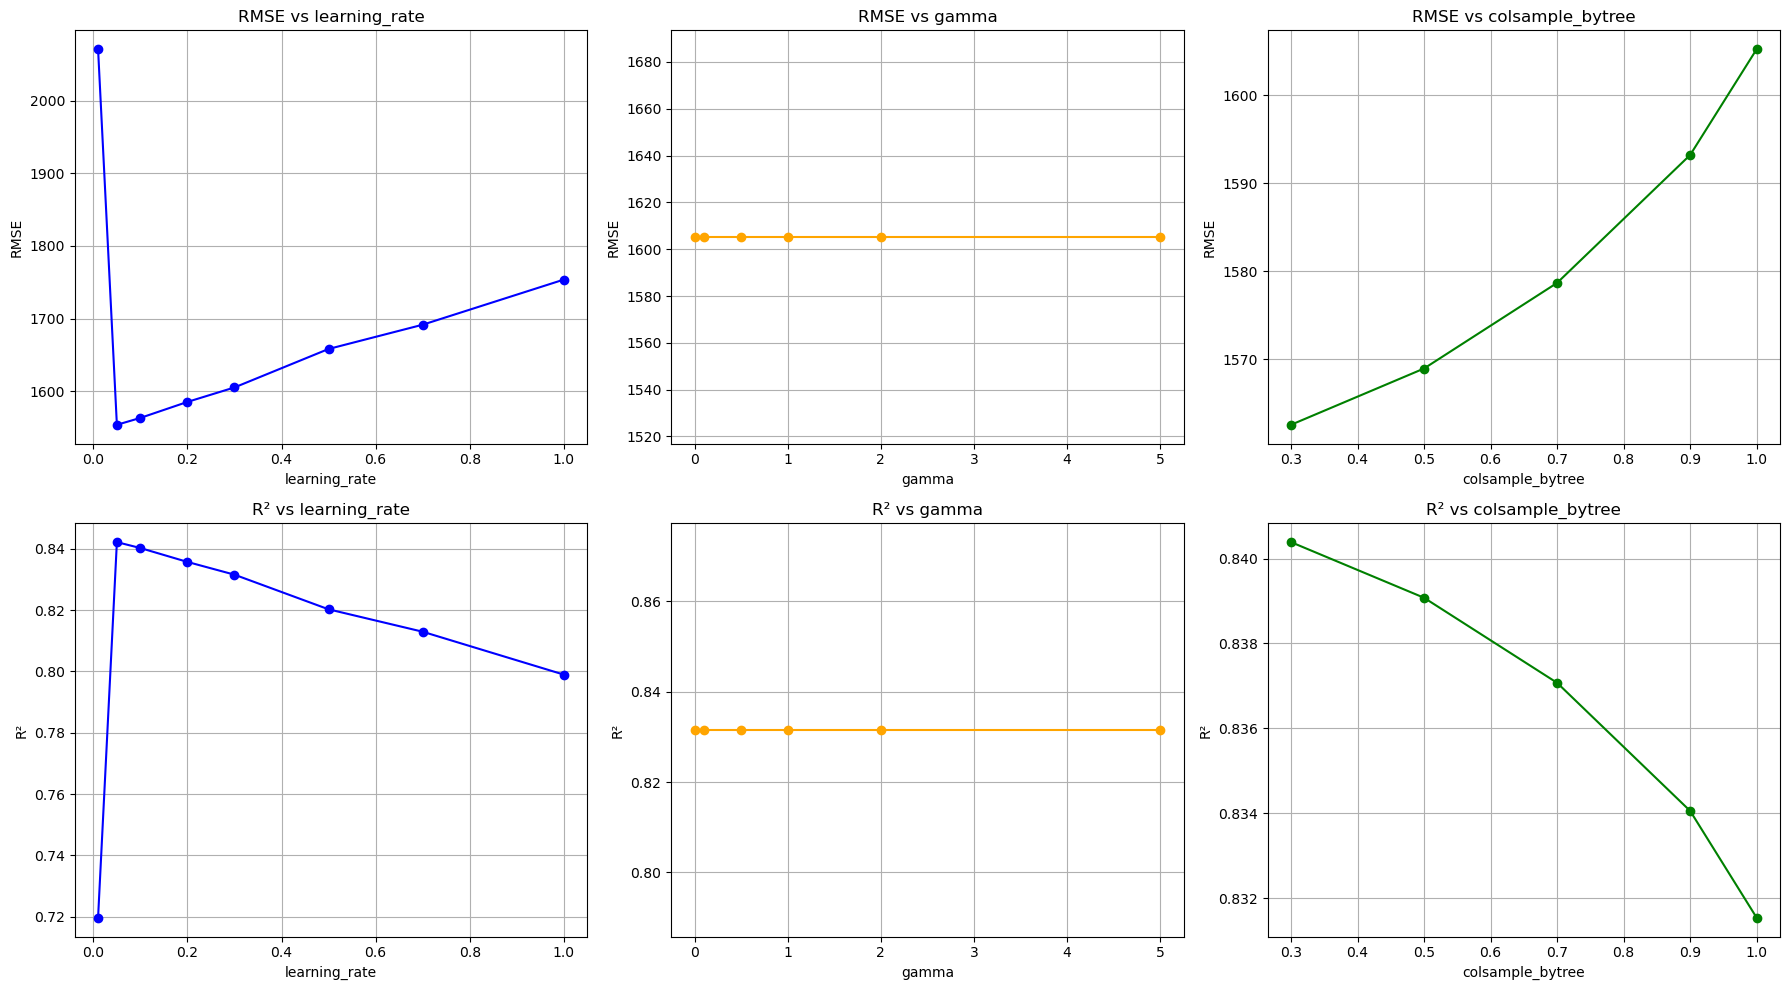

In [52]:
### RMSE y R^2 segun valores de hiperparametros
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Valores a evaluar
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0]
gamma_values = [0, 0.1, 0.5, 1, 2, 5]
colsample_values = [0.3, 0.5, 0.7, 0.9, 1.0]

# Inicializar listas
rmse_lr, r2_lr = [], []
rmse_gamma, r2_gamma = [], []
rmse_colsample, r2_colsample = [], []

# Evaluar learning_rate
for lr in learning_rates:
    model = XGBRegressor(learning_rate=lr, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_lr.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_lr.append(r2_score(y_test, y_pred))

# Evaluar gamma
for gamma in gamma_values:
    model = XGBRegressor(gamma=gamma, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_gamma.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_gamma.append(r2_score(y_test, y_pred))

# Evaluar colsample_bytree
for cs in colsample_values:
    model = XGBRegressor(colsample_bytree=cs, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_colsample.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_colsample.append(r2_score(y_test, y_pred))

# Crear figura con 6 subplots (2 filas, 3 columnas)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# --- Fila 1: RMSE ---
axs[0, 0].plot(learning_rates, rmse_lr, marker='o', color='blue')
axs[0, 0].set_title('RMSE vs learning_rate')
axs[0, 0].set_xlabel('learning_rate')
axs[0, 0].set_ylabel('RMSE')
axs[0, 0].grid(True)

axs[0, 1].plot(gamma_values, rmse_gamma, marker='o', color='orange')
axs[0, 1].set_title('RMSE vs gamma')
axs[0, 1].set_xlabel('gamma')
axs[0, 1].set_ylabel('RMSE')
axs[0, 1].grid(True)

axs[0, 2].plot(colsample_values, rmse_colsample, marker='o', color='green')
axs[0, 2].set_title('RMSE vs colsample_bytree')
axs[0, 2].set_xlabel('colsample_bytree')
axs[0, 2].set_ylabel('RMSE')
axs[0, 2].grid(True)

# --- Fila 2: R2 ---
axs[1, 0].plot(learning_rates, r2_lr, marker='o', color='blue')
axs[1, 0].set_title('R² vs learning_rate')
axs[1, 0].set_xlabel('learning_rate')
axs[1, 0].set_ylabel('R²')
axs[1, 0].grid(True)

axs[1, 1].plot(gamma_values, r2_gamma, marker='o', color='orange')
axs[1, 1].set_title('R² vs gamma')
axs[1, 1].set_xlabel('gamma')
axs[1, 1].set_ylabel('R²')
axs[1, 1].grid(True)

axs[1, 2].plot(colsample_values, r2_colsample, marker='o', color='green')
axs[1, 2].set_title('R² vs colsample_bytree')
axs[1, 2].set_xlabel('colsample_bytree')
axs[1, 2].set_ylabel('R²')
axs[1, 2].grid(True)

# Ajustar espacio entre subplots
plt.tight_layout()
plt.show()

### Punto 8 - Comparación y análisis de resultados
En la celda 8 comparen los resultados obtenidos de los diferentes modelos (random forest y XGBoost) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [ ]:
# Celda 8
